In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#importing the data
df = pd.read_csv('/Users/hailing/Downloads/Clustering.docx/CustomerData.csv')
df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
df.shape

(8950, 18)

In [22]:
#check for data type and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [90]:
#Since there are some null values for "MINIMUM_PAYMENTS", we'll replace it with the mean value.
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

K-means clustering

In [525]:
# Choosing 2 dimensions for easy plotting, trying out with 3 different combinations
P1 = df.iloc[:,[6, 13]].values 
P2= df.iloc[:, [15, 13]].values 
P3= df.iloc[:, [14, 13]].values 

**P1- CASH_ADVANCE vs CREDIT_LIMIT**

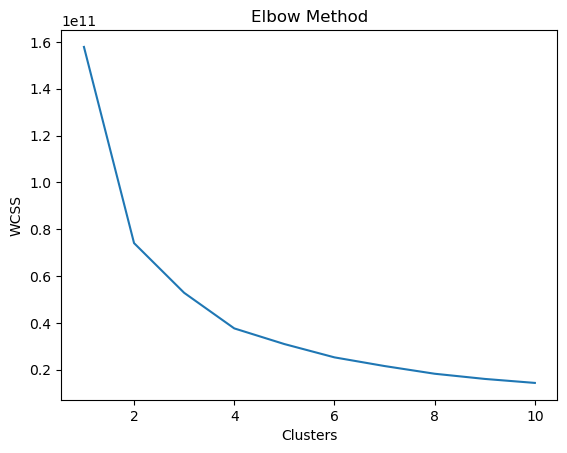

In [526]:
# Using Elbow Method
from sklearn.cluster import KMeans
wcss = []

# Within cluster sum of squares
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(P1)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show()

In [536]:
# Apply KMeans algorithm to the dataset

#Since there are 2 "elbow" falling around 2 and 4, we'll use 4 as our cluster size to have a better understanding of different clusters.
kmeans = KMeans(n_clusters=4, random_state=None, init='k-means++')
y_kmeans = kmeans.fit_predict(P1)

/Users/hailing/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


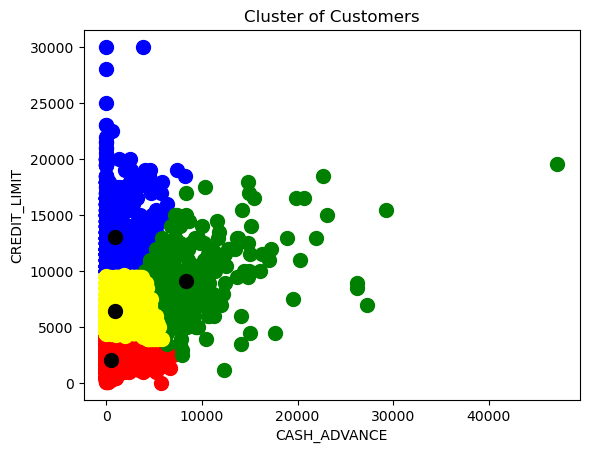

In [528]:
# Visualize the clusters
# c--> color
# s--> markersize
plt.scatter(P1[y_kmeans==0,0], X[y_kmeans==0,1],s=100, c='red', label='Cluster 1')
plt.scatter(P1[y_kmeans==1,0], X[y_kmeans==1,1],s=100, c='blue', label='Cluster 2')
plt.scatter(P1[y_kmeans==2,0], X[y_kmeans==2,1],s=100, c='green', label='Cluster 3')
plt.scatter(P1[y_kmeans==3,0], X[y_kmeans==3,1],s=100, c='yellow', label='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100, c='black', label='Centroids')

plt.title('Cluster of Customers')
plt.xlabel("CASH_ADVANCE")
plt.ylabel("CREDIT_LIMIT")
plt.show()

**P2-MINIMUM_PAYMENTS vs CREDIT_LIMIT**

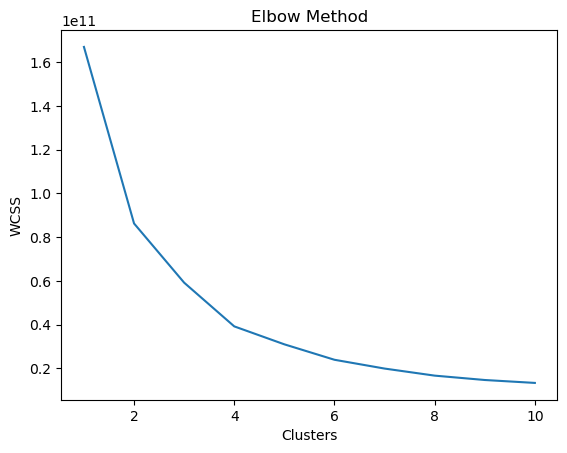

In [529]:
# Using Elbow Method
from sklearn.cluster import KMeans
wcss = []

# Within cluster sum of squares
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(P2)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show()

In [535]:
# Apply KMeans algorithm to the dataset
#Since there are 2 "elbow" falling around 2 and 4, we'll use 4 as our cluster size to have a better understanding of different clusters.
kmeans = KMeans(n_clusters=4, random_state=None, init='k-means++')
y_kmeans = kmeans.fit_predict(P2)

/Users/hailing/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


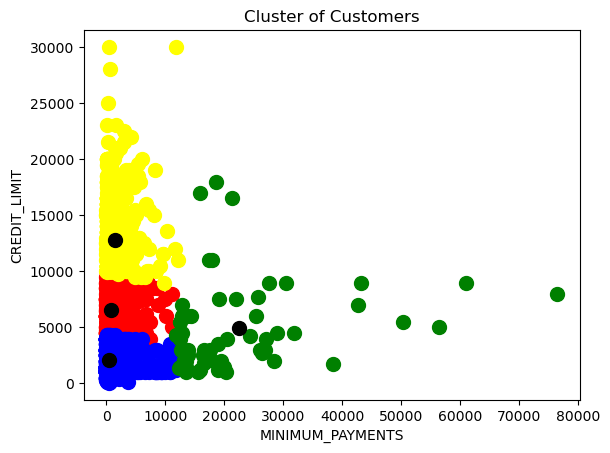

In [531]:
# Visualize the clusters
# c--> color
# s--> markersize
plt.scatter(P2[y_kmeans==0,0], X[y_kmeans==0,1],s=100, c='red', label='Cluster 1')
plt.scatter(P2[y_kmeans==1,0], X[y_kmeans==1,1],s=100, c='blue', label='Cluster 2')
plt.scatter(P2[y_kmeans==2,0], X[y_kmeans==2,1],s=100, c='green', label='Cluster 3')
plt.scatter(P2[y_kmeans==3,0], X[y_kmeans==3,1],s=100, c='yellow', label='Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100, c='black', label='Centroids')

plt.title('Cluster of Customers')
plt.xlabel("MINIMUM_PAYMENTS")
plt.ylabel("CREDIT_LIMIT")
plt.show()

**P3- PAYMENTS vs CREDIT_LIMIT**

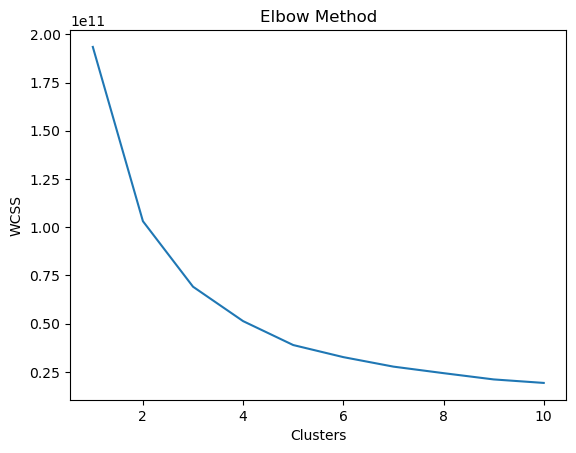

In [532]:
# Using Elbow Method
from sklearn.cluster import KMeans
wcss = []

# Within cluster sum of squares
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(P3)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.show()

In [539]:
# Apply KMeans algorithm to the dataset
#Since the "elbow" falls between 2 and 4, we'll use 4 as our cluster size to have a better understanding of different clusters.
kmeans = KMeans(n_clusters=3, random_state=None, init='k-means++')
y_kmeans = kmeans.fit_predict(P3)

/Users/hailing/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


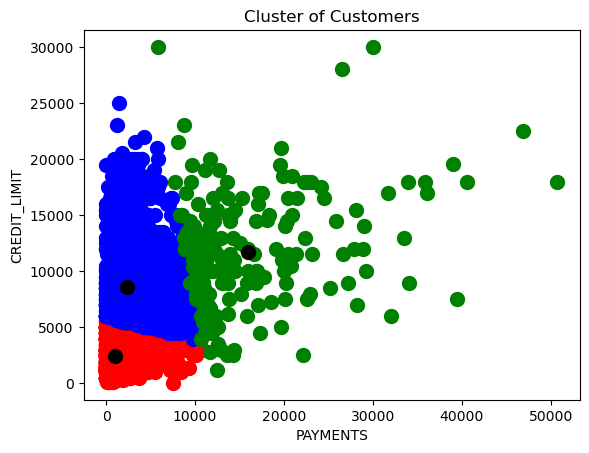

In [538]:
# Visualize the clusters
# c--> color
# s--> markersize
plt.scatter(P3[y_kmeans==0,0], X[y_kmeans==0,1],s=100, c='red', label='Cluster 1')
plt.scatter(P3[y_kmeans==1,0], X[y_kmeans==1,1],s=100, c='blue', label='Cluster 2')
plt.scatter(P3[y_kmeans==2,0], X[y_kmeans==2,1],s=100, c='green', label='Cluster 3')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100, c='black', label='Centroids')

plt.title('Cluster of Customers')
plt.xlabel("PAYMENTS")
plt.ylabel("CREDIT_LIMIT")
plt.show()

Hierarchial clustering /Agglomerative clustering

In [470]:
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_model.fit_predict(P1) 
agg_clusters


array([1, 2, 2, ..., 1, 1, 1])

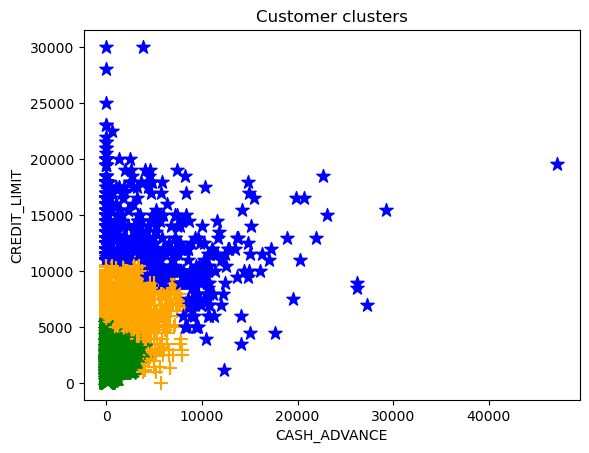

In [523]:
%matplotlib inline

def plot_clusters(samples, clusters):
    col_dic = {0:'blue',1:'green',2:'orange'}
    mrk_dic = {0:'*',1:'x',2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0], samples[sample][1], color = colors[sample], marker=markers[sample], s=100)
    plt.xlabel('CASH_ADVANCE')
    plt.ylabel('CREDIT_LIMIT')
    plt.title('Customer clusters')
    plt.show()

plot_clusters(P1, agg_clusters)

Conclusion:
1. We use the Elbow method to determine the number of clusters to run in our ML model.

2. K-means model would be a better model for us to use as it shows us the mid-point of the cluster (the black dot).

3. Based on the 3 different types of combinations used for our clusters,there are always 2-3 diff clusters stacking against each other based on the credit limit (y-axis), and another cluster stacking on the right.